In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv("cleveland.csv")
df = df[df.num <= 1]
df.columns = df.columns.str.replace(' ', '')
df.replace('?', 0, inplace=True)
df.tail()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingElectrocardiographic,MaximumHeartRate,ExerciseInducedAngina,STDepression,ExerciseSlope,MajorVessels,thal,num
295,41,1,2,120,157,0,0,182,0,0.0,1,0,3,0
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,0,3,0


In [110]:
inputs = df.drop('num', axis='columns')
target = df['num']

In [111]:
inputs.tail()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingElectrocardiographic,MaximumHeartRate,ExerciseInducedAngina,STDepression,ExerciseSlope,MajorVessels,thal
295,41,1,2,120,157,0,0,182,0,0.0,1,0,3
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3
302,38,1,3,138,175,0,0,173,0,0.0,1,0,3


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [114]:
len(X_train)

175

In [115]:
len(X_test)

44

In [116]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [117]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [118]:
# Return the mean accuracy on the given test data and labels.
model.score(X_test, y_test)

0.7727272727272727

In [119]:
model.predict([[63,1,1,145,233,1,2,150,0,2.3,3,0,6]])

array([0], dtype=int64)

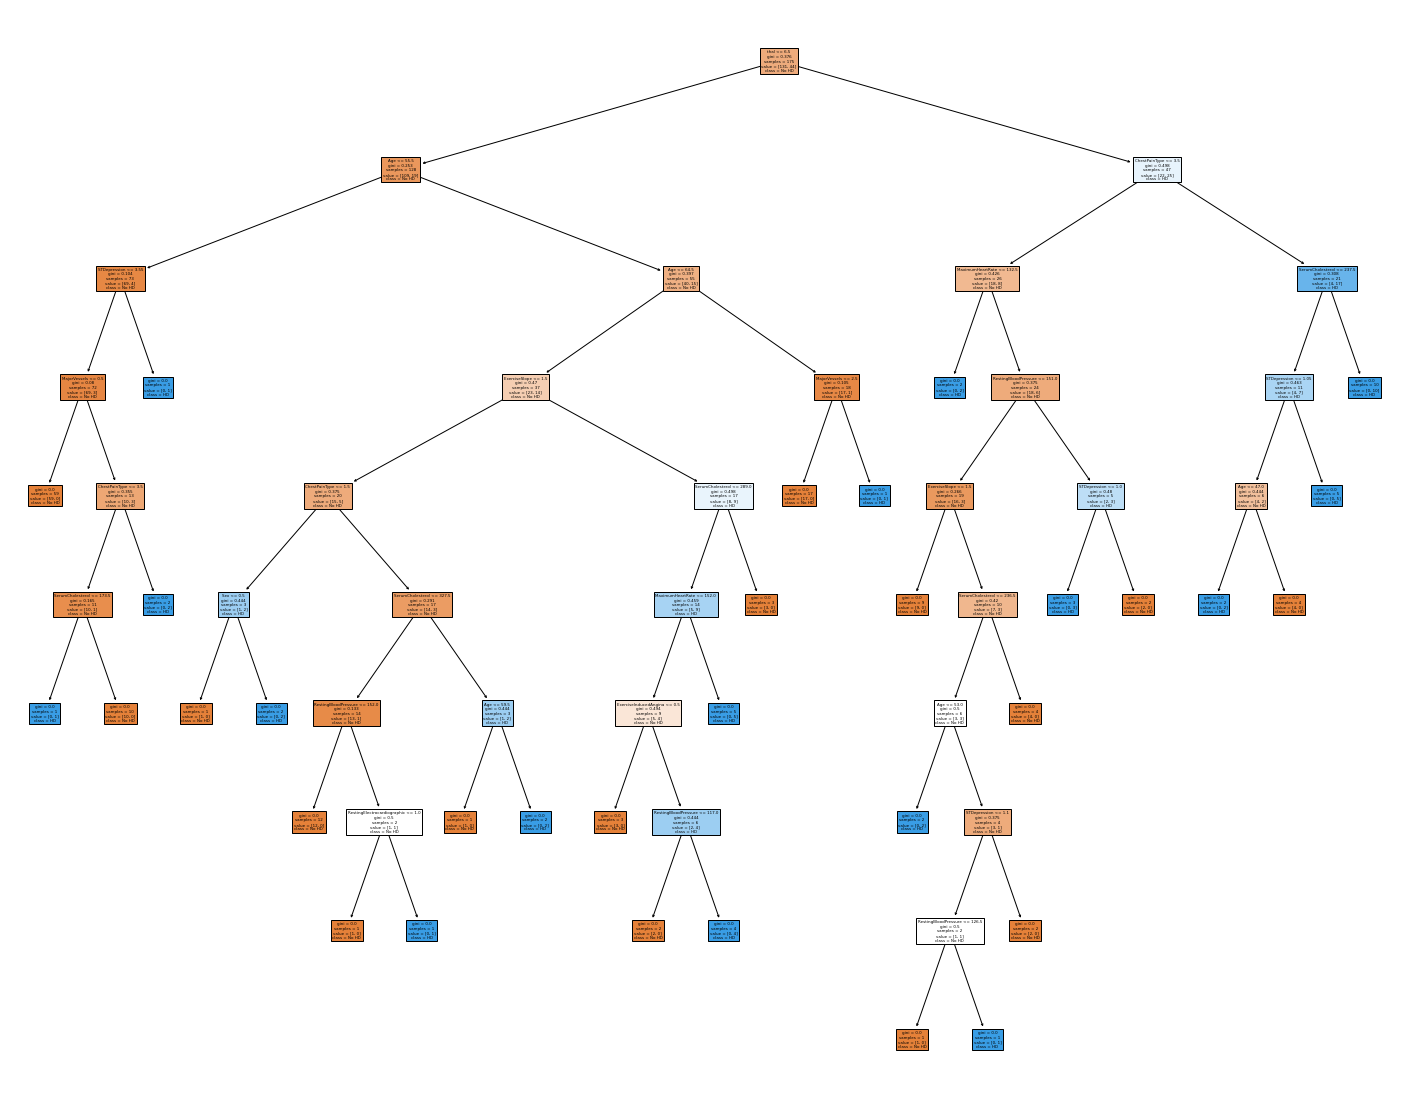

In [120]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=inputs.columns,  
                   class_names=["No HD", "HD"],
                   filled=True)